In [1]:
import cabean
import biolqm
from colomoto_jupyter import tabulate

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-07-01`

Import the model for the tumour cell invation and migration (Cohen et al. https://doi.org/10.1371/journal.pcbi.1004571)

In [2]:
model = biolqm.load("http://ginsim.org/sites/default/files/SuppMat_Model_Master_Model.zginml")

Downloading http://ginsim.org/sites/default/files/SuppMat_Model_Master_Model.zginml

Use the decompositon-based attractor detection method to identify all the exact attractors of the network. 

In [3]:
%time attractors = cabean.attractors(model)
tabulate(attractors)

CPU times: user 13.5 ms, sys: 6.58 ms, total: 20 ms
Wall time: 991 ms


,AKT1,AKT2,Apoptosis,CDH1,CDH2,CTNNB1,CellCycleArrest,DKK1,DNAdamage,ECMicroenv,EMT,ERK,GF,Invasion,Metastasis,Migration,NICD,SMAD,SNAI1,SNAI2,TGFbeta,TWIST1,VIM,ZEB1,ZEB2,miR200,miR203,miR34,p21,p53,p63,p73
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
2,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0
3,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1
4,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0
5,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0
6,0,1,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0
7,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
8,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0


Define the properties of the source and target attractors. Note that source or target may correspond to serveral attractors.

In [4]:
source = {"Invasion":0,"Migration":0}
target = {"CellCycleArrest": 1,"EMT":1,"Invasion":1,"Migration":1,"Metastasis":1,"Apoptosis":0}

Define a set of nodes that cannot be perturbed. 

In [5]:
exclude = ["DNAdamage", "ECMicroenv", "AKT1", "AKT2"]

Compute the minimal one-step instantaneous control (OI) from the source to the target.

In [6]:
c1i = cabean.OneStep_Instantaneous(model)
%time s1i = c1i.attractor_to_attractor(source, target, exclude=exclude)
s1i

CPU times: user 22.1 ms, sys: 46.9 ms, total: 69.1 ms
Wall time: 19.2 s


[
 FromSteadyState('a3', InstantaneousPerturbation(CDH2=1, SNAI1=1, SNAI2=1, TWIST1=1, miR200=0)),
 
 FromSteadyState('a4', InstantaneousPerturbation(NICD=1, SNAI2=1, ZEB1=1, miR200=0, miR203=0, p53=0))]

In [7]:
s1i.as_table()

,CDH2,NICD,SNAI1,SNAI2,TWIST1,ZEB1,miR200,miR203,p53
0,,1,,1,,1,0,0,0
1,1,,1,1,1,,0,,


Compute the attractor-based sequential instantaneous control (ASI) from the source to the target.

In [8]:
ci = cabean.AttractorSequential_Instantaneous(model)
%time si = ci.attractor_to_attractor(source, target, exclude=exclude)
si

CPU times: user 25.4 ms, sys: 50.6 ms, total: 76 ms
Wall time: 19.1 s


[
 FromSteadyState('a3', InstantaneousPerturbation(CDH2=1, SNAI1=1, SNAI2=1, TWIST1=1, miR200=0)),
 
 FromSteadyState('a4', InstantaneousPerturbation(NICD=1, SNAI2=1, ZEB1=1, miR200=0, miR203=0, p53=0))]

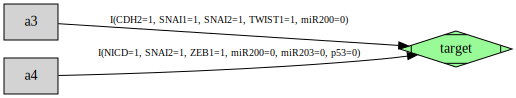

In [9]:
si.as_graph()

In [10]:
si.as_table()

,CDH2,NICD,SNAI1,SNAI2,TWIST1,ZEB1,miR200,miR203,p53
0,,1,,1,,1,0,0,0
1,1,,1,1,1,,0,,


Compute the minimal one-step temporary control (OT) from the source to the target.

In [11]:
r1t = cabean.OneStep_Temporary(model)
%time s1t = r1t.attractor_to_attractor(source, target, exclude=exclude)
s1t

CPU times: user 23.9 ms, sys: 54.7 ms, total: 78.6 ms
Wall time: 24 s


[FromSteadyState('a3', TemporaryPerturbation(SNAI2=1, p63=0)),
 FromSteadyState('a3', TemporaryPerturbation(SNAI1=1, SNAI2=1)),
 FromSteadyState('a3', TemporaryPerturbation(SNAI2=1, TWIST1=1)),
 FromSteadyState('a3', TemporaryPerturbation(NICD=1, SNAI2=1)),
 FromSteadyState('a3', TemporaryPerturbation(CTNNB1=1, SNAI2=1)),
 FromSteadyState('a4', TemporaryPerturbation(SNAI1=1, p73=1)),
 FromSteadyState('a4', TemporaryPerturbation(SNAI1=1, p53=0)),
 FromSteadyState('a4', TemporaryPerturbation(SNAI1=1, SNAI2=1)),
 FromSteadyState('a4', TemporaryPerturbation(TWIST1=1, p73=1)),
 FromSteadyState('a4', TemporaryPerturbation(TWIST1=1, p53=0)),
 FromSteadyState('a4', TemporaryPerturbation(SNAI2=1, TWIST1=1)),
 FromSteadyState('a4', TemporaryPerturbation(NICD=1, p73=1)),
 FromSteadyState('a4', TemporaryPerturbation(NICD=1, p53=0)),
 FromSteadyState('a4', TemporaryPerturbation(NICD=1, SNAI2=1)),
 FromSteadyState('a4', TemporaryPerturbation(CTNNB1=1, p53=0)),
 FromSteadyState('a4', TemporaryPerturb

In [12]:
s1t.as_table()

,CTNNB1,NICD,SNAI1,SNAI2,TWIST1,p53,p63,p73
0,,,,,1,,,1
1,,,,,1,0,,
2,,,,1,,,0,
3,,,,1,1,,,
4,,,1,,,,,1
5,,,1,,,0,,
6,,,1,1,,,,
7,,1,,,,,,1
8,,1,,,,0,,
9,,1,,1,,,,


Compute the attractor-based sequential temporary control (AST) from the source to the target.

In [13]:
ct = cabean.AttractorSequential_Temporary(model)
%time st = ct.attractor_to_attractor(source, target, exclude=exclude)
st

CPU times: user 23 ms, sys: 51.8 ms, total: 74.8 ms
Wall time: 22.9 s


[FromSteadyState('a3', TemporaryPerturbation(SNAI2=1, p63=0)),
 FromSteadyState('a3', TemporaryPerturbation(SNAI1=1, SNAI2=1)),
 FromSteadyState('a3', TemporaryPerturbation(SNAI2=1, TWIST1=1)),
 FromSteadyState('a3', TemporaryPerturbation(NICD=1, SNAI2=1)),
 FromSteadyState('a3', TemporaryPerturbation(CTNNB1=1, SNAI2=1)),
 FromSteadyState('a4', TemporaryPerturbation(SNAI1=1, p73=1)),
 FromSteadyState('a4', TemporaryPerturbation(SNAI1=1, p53=0)),
 FromSteadyState('a4', TemporaryPerturbation(SNAI1=1, SNAI2=1)),
 FromSteadyState('a4', TemporaryPerturbation(TWIST1=1, p73=1)),
 FromSteadyState('a4', TemporaryPerturbation(TWIST1=1, p53=0)),
 FromSteadyState('a4', TemporaryPerturbation(SNAI2=1, TWIST1=1)),
 FromSteadyState('a4', TemporaryPerturbation(NICD=1, p73=1)),
 FromSteadyState('a4', TemporaryPerturbation(NICD=1, p53=0)),
 FromSteadyState('a4', TemporaryPerturbation(NICD=1, SNAI2=1)),
 FromSteadyState('a4', TemporaryPerturbation(CTNNB1=1, p53=0)),
 FromSteadyState('a4', TemporaryPerturb

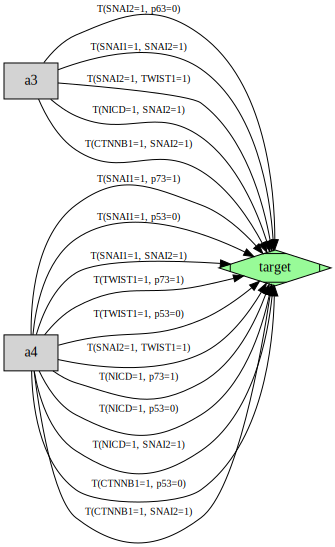

In [14]:
st.as_graph()

In [15]:
st.as_table()

,CTNNB1,NICD,SNAI1,SNAI2,TWIST1,p53,p63,p73
0,,,,,1,,,1
1,,,,,1,0,,
2,,,,1,,,0,
3,,,,1,1,,,
4,,,1,,,,,1
5,,,1,,,0,,
6,,,1,1,,,,
7,,1,,,,,,1
8,,1,,,,0,,
9,,1,,1,,,,


Compute the minimal one-step permanent control (OP) from the source to the target.

In [16]:
c1p = cabean.OneStep_Permanent(model)
%time s1p = c1p.attractor_to_attractor(source, target, exclude=exclude)
s1p

CPU times: user 27 ms, sys: 53.8 ms, total: 80.9 ms
Wall time: 25.2 s


[FromSteadyState('a3', PermanentPerturbation(SNAI2=1, p63=0)),
 FromSteadyState('a3', PermanentPerturbation(SNAI1=1, SNAI2=1)),
 FromSteadyState('a3', PermanentPerturbation(SNAI2=1, TWIST1=1)),
 FromSteadyState('a3', PermanentPerturbation(NICD=1, SNAI2=1)),
 FromSteadyState('a4', PermanentPerturbation(SNAI1=1, p53=0)),
 FromSteadyState('a4', PermanentPerturbation(SNAI1=1, SNAI2=1)),
 FromSteadyState('a4', PermanentPerturbation(TWIST1=1, p53=0)),
 FromSteadyState('a4', PermanentPerturbation(SNAI2=1, TWIST1=1)),
 FromSteadyState('a4', PermanentPerturbation(NICD=1, SNAI2=1))]

In [17]:
s1p.as_table()

,NICD,SNAI1,SNAI2,TWIST1,p53,p63
0,,,,1,0,
1,,,1,,,0
2,,,1,1,,
3,,1,,,0,
4,,1,1,,,
5,1,,1,,,


Compute the attractor-based sequential permanent control (ASP) from the source to the target.

In [18]:
c1p = cabean.AttractorSequential_Permanent(model)
%time s1p = c1p.attractor_to_attractor(source, target, exclude=[x for x in exclude if x != "AKT1"])
s1p

CPU times: user 22.7 ms, sys: 56 ms, total: 78.7 ms
Wall time: 25.7 s


[FromSteadyState('a3', PermanentPerturbation(SNAI2=1, p63=0)),
 FromSteadyState('a3', PermanentPerturbation(SNAI1=1, SNAI2=1)),
 FromSteadyState('a3', PermanentPerturbation(SNAI2=1, TWIST1=1)),
 FromSteadyState('a3', PermanentPerturbation(NICD=1, SNAI2=1)),
 FromSteadyState('a4', PermanentPerturbation(SNAI1=1, p53=0)),
 FromSteadyState('a4', PermanentPerturbation(SNAI1=1, SNAI2=1)),
 FromSteadyState('a4', PermanentPerturbation(TWIST1=1, p53=0)),
 FromSteadyState('a4', PermanentPerturbation(SNAI2=1, TWIST1=1)),
 FromSteadyState('a4', PermanentPerturbation(NICD=1, p53=0)),
 FromSteadyState('a4', PermanentPerturbation(NICD=1, SNAI2=1))]

In [19]:
s1p.as_table()

,NICD,SNAI1,SNAI2,TWIST1,p53,p63
0,,,,1,0,
1,,,1,,,0
2,,,1,1,,
3,,1,,,0,
4,,1,1,,,
5,1,,,,0,
6,1,,1,,,


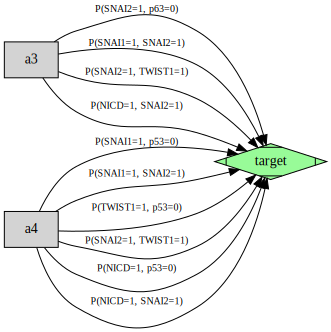

In [20]:
s1p.as_graph()